<a href="https://colab.research.google.com/github/hjhyunjinkim/Blur-Detection-Test/blob/main/FaceNet_Iterative_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output
!git clone -b blur-type-dataset --single-branch https://github.com/minsu1206/BlurFaceDetection.git

Cloning into 'BlurFaceDetection'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 259 (delta 63), reused 140 (delta 61), pack-reused 117
Receiving objects: 100% (259/259), 38.48 MiB | 37.35 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [2]:
# Install requirements
!pip install facenet_pytorch
!pip install -U Cython cmake numpy
!pip install onnxruntime
!pip install -U insightface
output.clear()

In [3]:
# Make directory to get sample data 
%cd '/content/BlurFaceDetection/FaceBlurring/data/'
!mkdir -p 'sample_root/clean/'
%cd 'sample_root/clean/'

/content/BlurFaceDetection/FaceBlurring/data
/content/BlurFaceDetection/FaceBlurring/data/sample_root/clean


In [4]:
# Download sample data and unzip to data directory
!gdown https://drive.google.com/uc?id=1jonSjJhywVMYHel3u8XNUQH684VyneWf
!unzip -o sample.zip
!rm sample.zip
output.clear()

Import necessary libraries

In [5]:
!pip install deepface
from deepface import DeepFace
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
output.clear()

<h3>Blur Defocus 25</h3>

In [6]:
# generate blur data with samples(It takes some time)
%cd '/content/BlurFaceDetection/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True --hyperparam '{"degree": 25}'

/content/BlurFaceDetection/FaceBlurring/dataset
Check all sample images(clean)...
4it [00:00, 2669.83it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 82533.08it/s]
download_path: /root/.insightface/models/buffalo_l
100% 281857/281857 [04:34<00:00, 1026.38KB/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider'

<h3>Blur Defocus 40</h3>

In [7]:
# generate blur data with samples(It takes some time)
%cd '/content/BlurFaceDetection/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True --hyperparam '{"degree": 40}'

/content/BlurFaceDetection/FaceBlurring/dataset
Check all sample images(clean)...
7it [00:00, 2685.95it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 79341.15it/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127

<h3>Blur Defocus 50</h3>

In [8]:
%cd '/content/BlurFaceDetection/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True --hyperparam '{"degree": 50}'

/content/BlurFaceDetection/FaceBlurring/dataset
Check all sample images(clean)...
9it [00:00, 2605.88it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 80251.28it/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127

<h3>Blur Defocus 60</h3>

In [9]:
%cd '/content/BlurFaceDetection/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True --hyperparam '{"degree": 60}'

/content/BlurFaceDetection/FaceBlurring/dataset
Check all sample images(clean)...
11it [00:00, 2363.96it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 74623.66it/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 12

<h3>Blur Defocus 75</h3>

In [10]:
%cd '/content/BlurFaceDetection/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True --hyperparam '{"degree": 75}'

/content/BlurFaceDetection/FaceBlurring/dataset
Check all sample images(clean)...
13it [00:00, 2437.68it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 80801.62it/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 12

<h3>Blur Defocus 80</h3>

In [11]:
%cd '/content/BlurFaceDetection/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True --hyperparam '{"degree": 90}'

/content/BlurFaceDetection/FaceBlurring/dataset
Check all sample images(clean)...
15it [00:00, 2239.43it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 77180.25it/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 12

<h3>Blur Defocus 100</h3>

In [12]:
%cd '/content/BlurFaceDetection/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True --hyperparam '{"degree": 100}'

/content/BlurFaceDetection/FaceBlurring/dataset
Check all sample images(clean)...
17it [00:00, 2440.30it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 80449.55it/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 12

<h2>Defocus 25 Test</h2>

In [13]:
import os
blur_images = os.listdir(r"../data/sample_root/blur_defocus_25/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [14]:
img1_path = blur_images[45]
img2_path = clean_images[45]
blur_img = os.path.join("../data/sample_root/blur_defocus_25/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

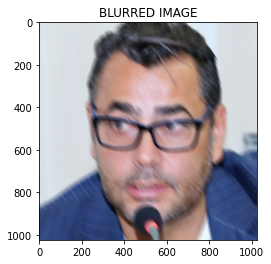

In [15]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

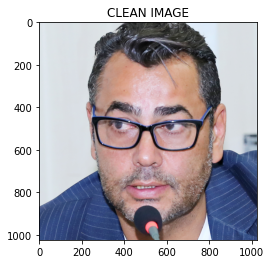

In [16]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

In [17]:
result1 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="cosine")
print(result1)
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean")
print(result2)
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean_l2")
print(result3)

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:02<00:00, 33.1MB/s]


{'verified': False, 'distance': 0.9149292634466937, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
{'verified': False, 'distance': 12.818891436977493, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}
{'verified': False, 'distance': 1.352722634871387, 'threshold': 0.8, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


<h2>Defocus 40 Test</h2>

In [18]:
import os
blur_images = os.listdir(r"../data/sample_root/blur_defocus_40/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [19]:
img1_path = blur_images[45]
img2_path = clean_images[45]
blur_img = os.path.join("../data/sample_root/blur_defocus_40/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

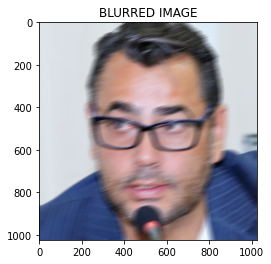

In [20]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

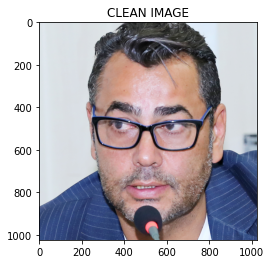

In [21]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

In [22]:
result1 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="cosine")
print(result1)
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean")
print(result2)
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean_l2")
print(result3)

{'verified': True, 'distance': 0.2391177264999349, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
{'verified': True, 'distance': 3.3456105126236793, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}
{'verified': True, 'distance': 0.6915456984175883, 'threshold': 0.8, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


<h2>Defocus 50 Test</h2>

In [23]:
blur_images = os.listdir(r"../data/sample_root/blur_defocus_50/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [24]:
img1_path = blur_images[45]
img2_path = clean_images[45]
blur_img = os.path.join("../data/sample_root/blur_defocus_50/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

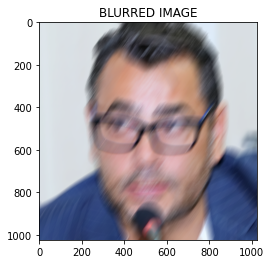

In [25]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

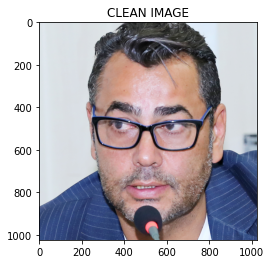

In [26]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

In [27]:
result1 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="cosine")
print(result1)
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean")
print(result2)
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean_l2")
print(result3)

{'verified': False, 'distance': 0.6834479292110356, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
{'verified': True, 'distance': 6.987634983969551, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}
{'verified': False, 'distance': 1.1691432155309596, 'threshold': 0.8, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


<h2>Defocus 60 Test</h2>

In [28]:
blur_images = os.listdir(r"../data/sample_root/blur_defocus_60/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [29]:
img1_path = blur_images[45]
img2_path = clean_images[45]
blur_img = os.path.join("../data/sample_root/blur_defocus_60/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

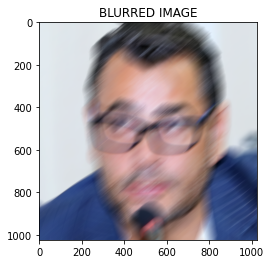

In [30]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

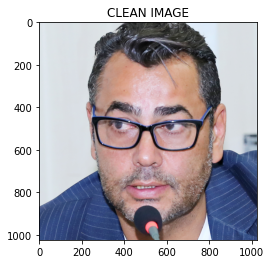

In [31]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

In [32]:
result1 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="cosine")
print(result1)
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean")
print(result2)
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean_l2")
print(result3)

{'verified': False, 'distance': 0.45658835526279784, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
{'verified': True, 'distance': 4.933629912018833, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}
{'verified': False, 'distance': 0.9556027995593126, 'threshold': 0.8, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


<h2>Defocus 75 Test</h2>

In [33]:
blur_images = os.listdir(r"../data/sample_root/blur_defocus_75/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [34]:
img1_path = blur_images[45]
img2_path = clean_images[45]
blur_img = os.path.join("../data/sample_root/blur_defocus_75/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

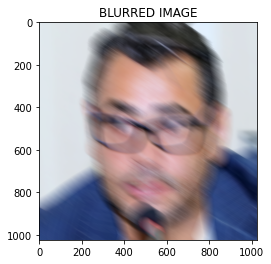

In [35]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

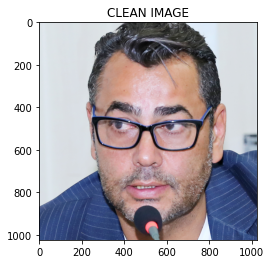

In [36]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

In [37]:
result1 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="cosine")
print(result1)
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean")
print(result2)
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean_l2")
print(result3)

{'verified': False, 'distance': 0.7590335926846115, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
{'verified': True, 'distance': 7.416109057793792, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}
{'verified': False, 'distance': 1.2320986914079661, 'threshold': 0.8, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


<h2>Defocus 90 Test</h2>

In [38]:
blur_images = os.listdir(r"../data/sample_root/blur_defocus_90/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [39]:
img1_path = blur_images[45]
img2_path = clean_images[45]
blur_img = os.path.join("../data/sample_root/blur_defocus_90/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

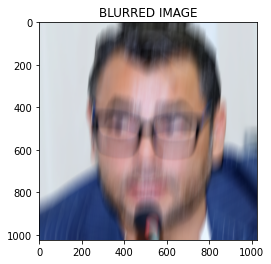

In [40]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

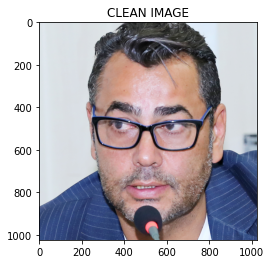

In [41]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

In [42]:
result1 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="cosine")
print(result1)
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean")
print(result2)
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean_l2")
print(result3)

{'verified': True, 'distance': 0.22076764760955292, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
{'verified': True, 'distance': 3.4827021194109125, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}
{'verified': True, 'distance': 0.6644812226234132, 'threshold': 0.8, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


<h2>Defocus 100 Test</h2>

In [43]:
blur_images = os.listdir(r"../data/sample_root/blur_defocus_100/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [44]:
img1_path = blur_images[45]
img2_path = clean_images[45]
blur_img = os.path.join("../data/sample_root/blur_defocus_100/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

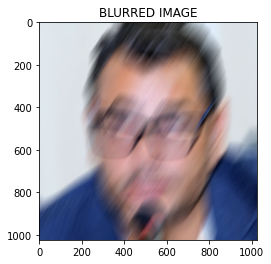

In [45]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

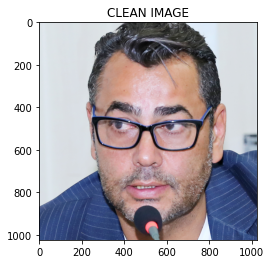

In [46]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

In [49]:
result1 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="cosine")
print(result1)
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean")
print(result2)
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="Facenet", distance_metric="euclidean_l2")
print(result3)

{'verified': True, 'distance': 0.2562216814929694, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
{'verified': True, 'distance': 3.632868016385925, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}
{'verified': True, 'distance': 0.7158514950644015, 'threshold': 0.8, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}
